# Fitting a Line Using MCMC
By Griffin Hosseinzadeh (2019 April 17)  
Updated by Charlotte Mason (2020 August 28)  
Updated by Griffin Hosseinzadeh (2025 April 30)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import emcee
import corner

## Generate Some Fake Data
Choose a slope $m$, intercept $b$, and scatter $\sigma$, and generate $N$ random points using the `np.random` module. Plot the results to see what your data look like. Our goal is to recover the parameters defined here. (Hint: this section is identical to the previous notebook.)

<ErrorbarContainer object of 3 artists>

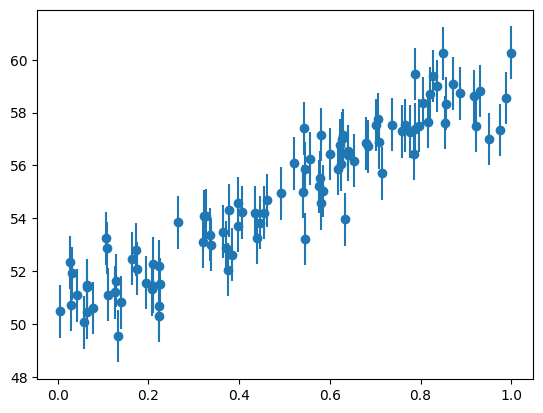

In [2]:
N = 100  # number of points
m = 10.  # slope
b = 50.  # intercept
sigma = 1.  # scatter

rng = np.random.default_rng()
x =  np.array(rng.random(N)) # complete with random values between 0 and 1
y = np.array((m*x+b)) + np.array(rng.normal(loc=0, scale=sigma, size=N)) # equation for a line PLUS random values from a Gaussian centered at 0 with standard deviation `sigma`
dy = np.ones(N) # array of error bars for all the data (all `sigma`)
plt.errorbar(x, y, yerr=dy, fmt="o")

# plot your generated data with error bars

## Write Down the Posterior
Define functions that return the prior, the likelihood, and the posterior given a parameter vector `theta = [m, b]`. For computational accuracy (and convenience), we actually want to do this in log space. You can either use `np.log` (natural log) or `np.log10` (base-10 log). Regardless of the shape of your prior, it's good practice to limit the values of $m$ and $b$ to some reasonable range. (Hint: this section is identical to the previous notebook.)

In [3]:
m_min = 0.
m_max = 100.
b_min = 0.
b_max = 100.

theta = [m,b]

def log_prior(theta):
    """
    Returns log(prior) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    
    Returns
    -------
    ln_prior: float
        Natural log of the prior probability function
    """
    if theta[0] > m_min and theta[0] < m_max and theta[1] > b_min and theta[1] < b_max:
        ln_prior = 0
    else:
        ln_prior = -np.inf
    return ln_prior

def log_likelihood(theta, x, y, dy):
    """complete"""
    m, b = theta
    model = m * x + b
    total = 0
    for i in range(N):
        first_factor = np.log(2*np.pi*(dy[i]**2))
        ln_L = first_factor+((y[i]-model[i])/dy[i])**2
        total += ln_L
        total_f = total*-0.5
    return total_f


def log_posterior(theta, x, y, dy):
    """complete"""
    log_pos = log_likelihood(theta,x,y,dy) + log_prior(theta)
    return log_pos
    
 

## Set Up the Ensemble Sampler
This time we will use the `emcee` package that you imported above to sample the posterior probability distribution. Everything you need is contained within the `emcee.EnsembleSampler` class. Initialize this with 100 walkers and the `log_posterior` function you defined above. Don't forget that `log_posterior` takes additional arguments `x`, `y`, and `dy`. (Hint: check the documentation for `EnsembleSampler` for how to deal with this.)

Note, we will initialise the sampler in #1.5

In [4]:
n_walkers = 100
n_params = 2 # complete
args = (x,y,dy) # complete

## Setup random initial guesses for the starting positions

You'll need to give initial guesses for each walker, which you can draw randomly from the prior. 

In [5]:
sample = 100
m_random = rng.uniform(low=m_min, high=m_max, size=sample) # complete
b_random = rng.uniform(low=b_min, high=b_max, size=sample)# complete



initial_guesses = np.array([m_random,b_random]).T # complete
print(initial_guesses)

[[5.27302877e+01 1.52555973e+01]
 [7.92894260e+01 3.04406196e+01]
 [9.10775593e+01 4.45349416e+01]
 [6.68196423e+01 5.48950369e+01]
 [6.87189959e+01 7.08963060e+00]
 [2.06220131e+01 9.36093709e+01]
 [8.25123798e+01 1.05696547e+01]
 [6.66901790e+01 9.02877526e+01]
 [3.15130744e+01 6.41892213e+00]
 [7.89865640e+01 3.15354023e+00]
 [2.80046394e+01 9.13731644e+00]
 [7.46438706e+01 5.47416318e+01]
 [4.72959579e+01 1.76620741e+01]
 [3.69609695e+00 7.39202629e+01]
 [1.89563182e+01 7.77440654e+00]
 [7.35382672e+01 4.23257150e+01]
 [4.77297065e+00 2.83897410e+01]
 [6.78063395e+01 5.70258153e+01]
 [1.95322832e+01 2.31861114e+01]
 [4.90948801e+00 5.09420527e+01]
 [7.36656628e+01 2.65573739e+01]
 [3.45176045e+01 3.23321553e+01]
 [3.86114419e+01 8.95164395e+01]
 [7.85586600e+01 9.46241789e+01]
 [4.40016900e+00 8.96119549e+01]
 [6.79895907e+01 3.23634960e+01]
 [7.84884767e+01 5.41880820e+01]
 [8.78069731e+01 7.52115515e+01]
 [6.62971858e+01 8.73971705e+01]
 [3.79891074e+01 9.55125393e+01]
 [5.394923

## Initialize and run!

Initialize the `EnsembleSampler` object and then run it with the `run_mcmc` method. For now, 10000 steps is more than enough, and should run in less than a minute on your laptop. If this command takes too long, ask for help.

In [6]:
# initialize the sampler
n_steps = 10000
sampler = emcee.EnsembleSampler(n_walkers, n_params, log_posterior, args = args)  # complete

# run!

sampler.run_mcmc(initial_guesses, n_steps, progress = True)  # complete

100%|██████████| 10000/10000 [02:18<00:00, 72.45it/s]


State([[ 9.10712193 50.43457167]
 [ 8.9617419  50.46383577]
 [ 9.1790796  50.18353371]
 [ 9.44428774 50.19172989]
 [ 8.53310178 50.60131382]
 [ 9.51856134 50.28500835]
 [ 8.86098875 50.46392589]
 [ 9.53027285 50.12242752]
 [ 8.75336447 50.34353823]
 [ 9.34378033 50.26804364]
 [ 9.39937181 50.09096347]
 [ 9.28853435 50.43115175]
 [ 8.93371228 50.48135955]
 [ 8.97745808 50.50256126]
 [ 9.75210049 49.89307634]
 [ 9.39987411 50.20631227]
 [ 9.80576684 49.86418084]
 [ 9.55279305 50.03301426]
 [ 9.59078742 50.24472967]
 [ 9.55798077 49.97764033]
 [ 9.00078973 50.5266692 ]
 [ 8.95419997 50.54202571]
 [ 9.14226119 50.36793692]
 [ 9.29921949 50.29641771]
 [ 9.25278485 50.2370982 ]
 [ 8.31658335 50.90772993]
 [ 9.3850554  50.2852058 ]
 [ 9.18666589 50.4735443 ]
 [ 8.84382376 50.47040786]
 [10.01447801 49.90082219]
 [ 8.59999555 50.83396196]
 [ 9.17762102 50.15395504]
 [ 8.71009127 50.27035443]
 [ 9.37224298 50.18902519]
 [ 9.17360485 50.40548304]
 [ 9.54833076 50.24432631]
 [ 9.55938591 50.12868

## Plot the Results
First make a plot of the walker positions (value of each parameter) at each step. Write a function to do this, since you'll be using it a lot.

In [7]:
print(sampler.chain.shape)  # check that this has dimensions (n_walkers, n_steps, n_params)

def chain_plots(chain,steps, **kwargs):
    """
    Plot the histories for each walker in sampler.chain
    
    Parameters
    ----------
    chain: ndarray
        3D array given by sampler.flatchain, with shape (n_walkers, n_steps, n_params)
    kwargs: `.Line2D` properties, optional
        All keyword arguments are passed to `pyplot.plot`
    """
    
    plt.figure()
    for i in range(n_walkers):
        plt.plot(chain[i, steps:,0])
    #plt.xscale("log")
    plt.xlabel('Step Number')
    plt.ylabel('Slope, (m)')
    plt.xlim(1,100)

    plt.figure()
    for i in range(n_walkers):
        plt.plot(chain[i, steps:,1])
    #plt.xscale("log")
    plt.xlabel('Step Number')
    plt.ylabel('Intercept, (b)')
    plt.xlim(1,100)

(100, 10000, 2)


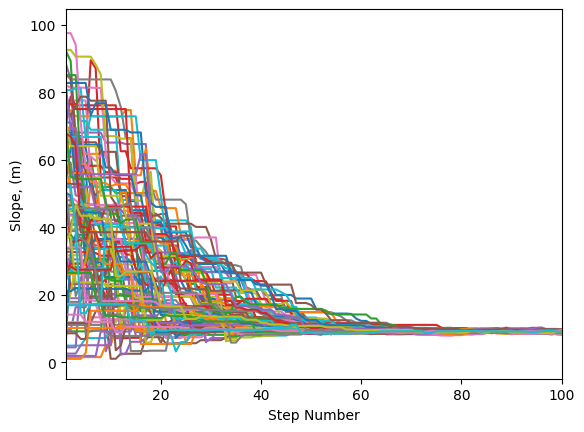

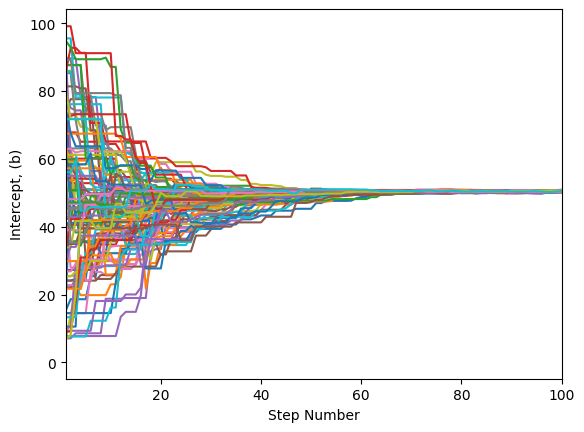

In [8]:
 chain_plots(sampler.chain, steps=0, alpha = 0.5)

Each one of those colored lines is a walker. They started out at your initial guesses. What do you immediately notice?

Try making more useful plots by zooming in on the relevant parts. Hint: you can adjust line opacity in matplotlib with the `alpha` parameter.

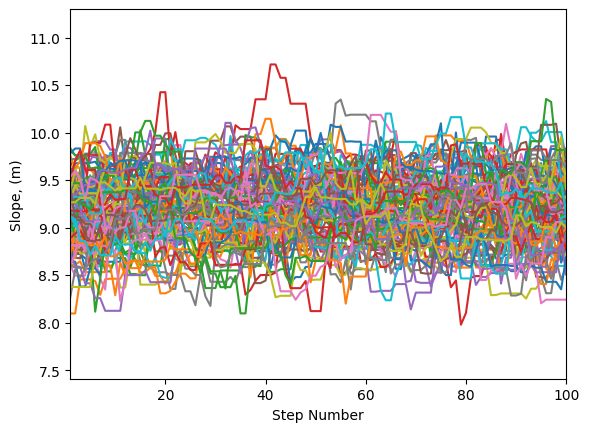

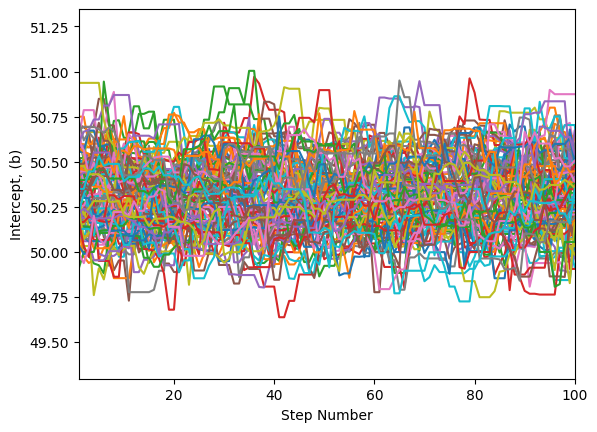

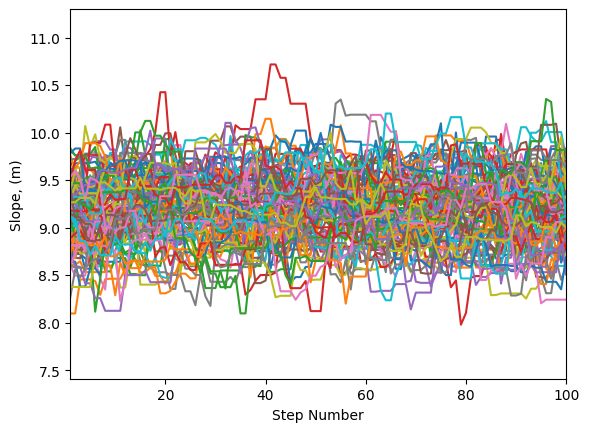

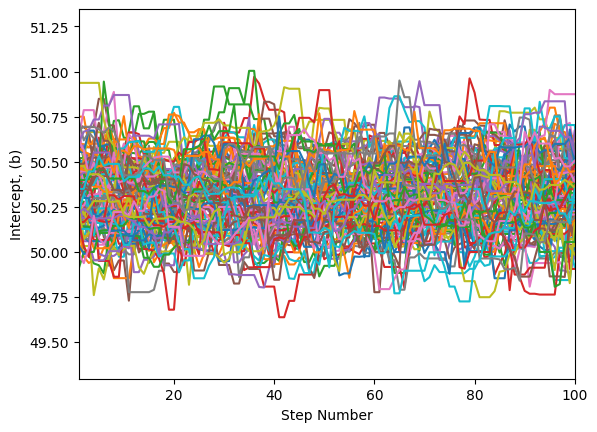

In [9]:
n_burn = 100 # complete
chain_plots(sampler.chain, steps=n_burn, alpha = 0.5)
chain_plots(sampler.chain, steps=n_burn, alpha = 0.5)

Are your chains converged? How many steps did it take for this to happen? This is called the "burn-in" period. **From now on, only use the steps after the burn-in period.**

Now make a scatter plot of the two parameters, one point for each walker-step. Hint: `sampler.flatchain`.

[[52.7302877  15.25559727]
 [69.53327105 22.03291753]
 [92.33030134 39.59853996]
 ...
 [ 9.03298454 50.56132491]
 [ 9.30963023 50.40112268]
 [ 9.51814313 50.24408342]]


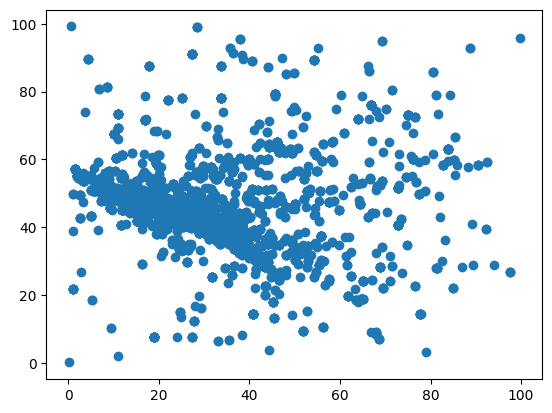

In [16]:
samples = sampler.flatchain
print(samples)
plt.scatter(samples[:, 0], samples[:, 1])

How does this compare to the distribution you had in the previous notebook (assuming you used the same parameters)?

Now let's marginalize over each parameter. Given that we have walkers that are distributed according to the 2D posterior, think about how to calculate the marginalized posterior for each parameter.

[52.7302877  69.53327105 92.33030134 ...  9.03298454  9.30963023
  9.51814313]


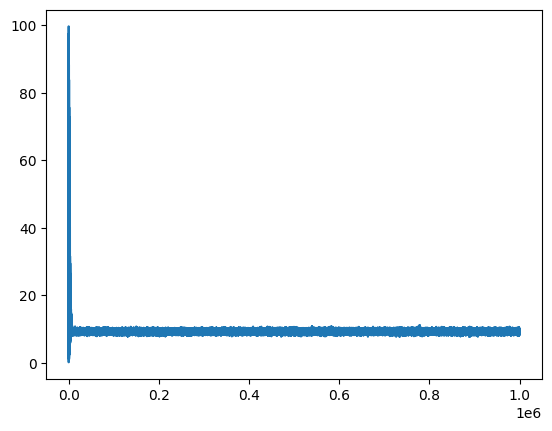

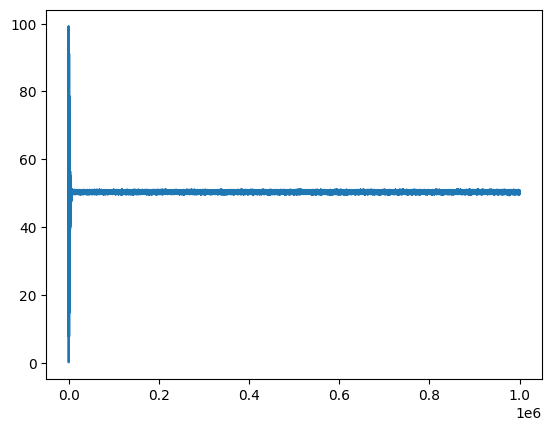

In [34]:
posterior_marginalized_m = samples[:, 0]
print(posterior_marginalized_m)
plt.figure()
plt.plot(posterior_marginalized_m)
#plt.xscale("log")
# complete

posterior_marginalized_b = samples[:, 1]
plt.figure()
plt.plot(posterior_marginalized_b)
#plt.xscale("log")

# complete

Calculate the medians and the 68% ($1\sigma$) confidence intervals for each parameter. Check your answers against the centers and widths of the distributions you just plotted above. Do they look about right?

In [35]:
# complete
print(f'$m = {m_med:.2f}_{{{dm_lo:+.2f}}}^{{{dm_hi:+.2f}}}$')

# complete
print(f'$b = {b_med:.2f}_{{{db_lo:+.2f}}}^{{{db_hi:+.2f}}}$')

NameError: name 'm_med' is not defined

There's an easy way to generate all these plots and summary statistics: `corner.corner`! Produce a corner plot with the true parameters labeled and the best-fit values (with error bars) printed on the plot. How close did we get to the parameters we used to generate the data?

In [ ]:
corner.corner(  # complete

## Take-Away Message
MCMC is a much more efficient way to sample the probability distribution because the walkers mostly stay in the highest-probability region. Plus it essentially gives you the marginalized posteriors for free, because the density of walkers matches the probability density.

## Other Things to Try
- Add a parameter for the intrinsic scatter and redo the MCMC fit.
- Try implementing Metropolis-Hastings algorithm yourself and see if you can get the same results as `emcee`.